<a href="https://colab.research.google.com/github/anubhab16/MNIST-dataset-from-scratch/blob/main/MNIST_dataset_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
data=pd.read_csv("/content/mnist_train.csv")

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



In [5]:
Y_train

array([7., 0., 6., 8., 9., 0., 7., 2., 4., 6., 8., 1., 3., 8., 9., 8., 1.,
       7., 6., 4., 2., 3., 7., 7., 0., 1., 7., 0., 7., 6., 4., 2., 9., 6.,
       5., 5., 5., 0., 8., 1., 0., 2., 2., 4., 1., 6., 4., 8., 7., 4., 5.,
       3., 3., 1., 6., 5., 5., 1., 1., 7., 4., 3., 0., 6., 6., 7., 9., 7.,
       8., 7., 9., 9., 0., 8., 0., 2., 6., 0., 0., 0., 9., 8., 6., 1., 2.,
       9., 9., 6., 9., 2., 3., 0., 0., 1., 3., 6., 3., 8., 8., 5., 1., 6.,
       9., 0., 7., 7., 8., 1., 3., 0., 3., 3., 4., 3., 2., 1., 7., 6., 5.,
       2., 2., 8., 3., 0., 6., 8., 0., 0., 9., 6., 3., 8., 7., 0., 5., 1.,
       3., 9., 1., 1., 0., 5., 7., 4., 2., 1., 0., 0., 7., 6.])

In [14]:
def init_params():
  W1= np.random.rand(10,784)-0.5
  B1=np.random.rand(10,1)-0.5
  W2= np.random.rand(10,10)-0.5
  B2=np.random.rand(10,1)-0.5
  return W1,B1,W2,B2

def reLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
  return np.exp(Z)/sum(np.exp(Z))

def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = reLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
  one_hot_Y=np.zeros((Y.size, int(Y.max()+1)))
  one_hot_Y[np.arange(Y.size),Y.astype(int)]=1
  one_hot_Y=one_hot_Y.T
  return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    b2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [15]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, B1, W2, B2

In [21]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[4 1 4 4 4 1 0 5 4 5 1 4 4 8 6 1 1 8 5 4 4 4 2 4 1 4 1 1 8 1 4 5 8 1 5 2 1
 1 4 1 4 2 5 1 5 1 4 4 1 4 8 4 4 1 1 8 8 5 4 1 1 8 1 2 5 4 8 1 5 2 1 4 4 1
 1 1 5 8 1 8 5 4 2 4 1 4 4 2 4 4 5 1 1 4 1 4 8 1 1 1 4 4 5 4 4 1 4 4 4 2 1
 8 1 8 4 4 4 1 4 5 5 4 7 1 5 4 1 5 5 4 8 1 1 1 4 5 5 1 4 4 4 1 1 5 1 4 1 1
 1 5] [7. 0. 6. 8. 9. 0. 7. 2. 4. 6. 8. 1. 3. 8. 9. 8. 1. 7. 6. 4. 2. 3. 7. 7.
 0. 1. 7. 0. 7. 6. 4. 2. 9. 6. 5. 5. 5. 0. 8. 1. 0. 2. 2. 4. 1. 6. 4. 8.
 7. 4. 5. 3. 3. 1. 6. 5. 5. 1. 1. 7. 4. 3. 0. 6. 6. 7. 9. 7. 8. 7. 9. 9.
 0. 8. 0. 2. 6. 0. 0. 0. 9. 8. 6. 1. 2. 9. 9. 6. 9. 2. 3. 0. 0. 1. 3. 6.
 3. 8. 8. 5. 1. 6. 9. 0. 7. 7. 8. 1. 3. 0. 3. 3. 4. 3. 2. 1. 7. 6. 5. 2.
 2. 8. 3. 0. 6. 8. 0. 0. 9. 6. 3. 8. 7. 0. 5. 1. 3. 9. 1. 1. 0. 5. 7. 4.
 2. 1. 0. 0. 7. 6.]
0.07333333333333333
Iteration:  10
[4 1 5 4 4 1 0 5 4 5 1 1 4 8 6 1 1 8 5 3 4 4 2 4 8 4 1 1 8 1 4 5 8 1 5 2 1
 1 4 1 4 2 5 1 5 1 4 4 1 4 8 8 8 1 1 6 8 5 4 1 1 8 1 2 5 4 8 1 5 2 1 4 4 1
 1 1 5 8 1 8 5 4 2 4 1 4 4 2 4 4 5 1 

In [22]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, B1, W2, B2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7.0


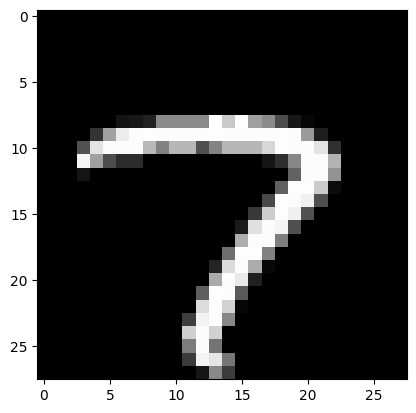

Prediction:  [0]
Label:  0.0


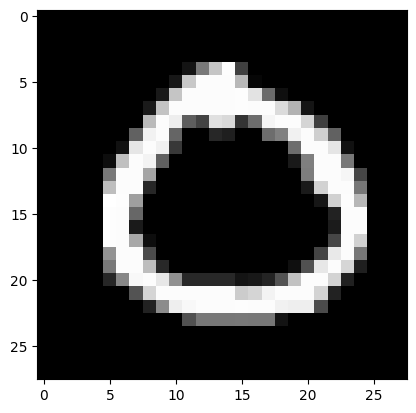

Prediction:  [7]
Label:  7.0


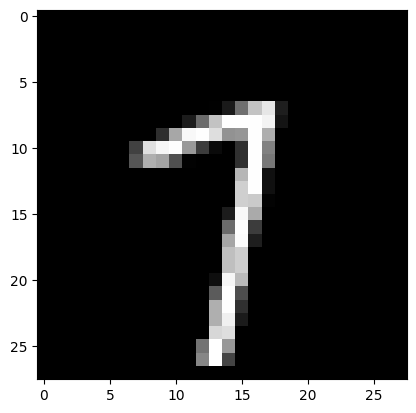

In [23]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(1,W1,B1,W2,B2)
test_prediction(6,W1,B1,W2,B2)